# –ú–æ–¥–µ–ª—å –∞–Ω–∞–ª–∏–∑–∞—Ç–æ—Ä–∞ —Ñ–æ—Ç–æ

In [1]:
import os

dataset_path = "image/"
print(os.listdir(dataset_path))


['alfredo', 'broccoli', 'brownie', 'cake', 'carrot', 'cereal', 'cheese', 'chicken', 'chocolate', 'coffee', 'cookie', 'corn', 'couscous', 'crab', 'donut', 'egg', 'fajitas', 'fries', 'grilledcheese', 'hotdog', 'icecream', 'macncheese', 'nachos', 'nuggets', 'rice', 'salad', 'salmon', 'shrimp', 'soup', 'steak', 'sushi', 'tartare']


## –ó–∞–≥—Ä—É–∂–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è

–ò –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–µ–π (—Å–¥–≤–∏–≥–∏ –ø–æ–≤–æ—Ä–æ—Ç—ã)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_height, img_width = 224, 224
batch_size = 32


datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,        # –ü–æ–≤–æ—Ä–æ—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    width_shift_range=0.2,    # –°–¥–≤–∏–≥ –ø–æ —à–∏—Ä–∏–Ω–µ
    height_shift_range=0.2,   # –°–¥–≤–∏–≥ –ø–æ –≤—ã—Å–æ—Ç–µ
    shear_range=0.2,          # –ò—Å–∫–∞–∂–µ–Ω–∏–µ (shear)
    zoom_range=0.2,           # –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ
    horizontal_flip=True,     # –û—Ç—Ä–∞–∂–µ–Ω–∏–µ –ø–æ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª–∏
    fill_mode='nearest'       # –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø–∏–∫—Å–µ–ª–µ–π –ø–æ—Å–ª–µ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏
)

# –ü–µ—Ä–µ—Å–æ–∑–¥–∞–µ–º –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä—ã —Å –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–µ–π
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 7609 images belonging to 32 classes.
Found 1881 images belonging to 32 classes.


## –ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö 

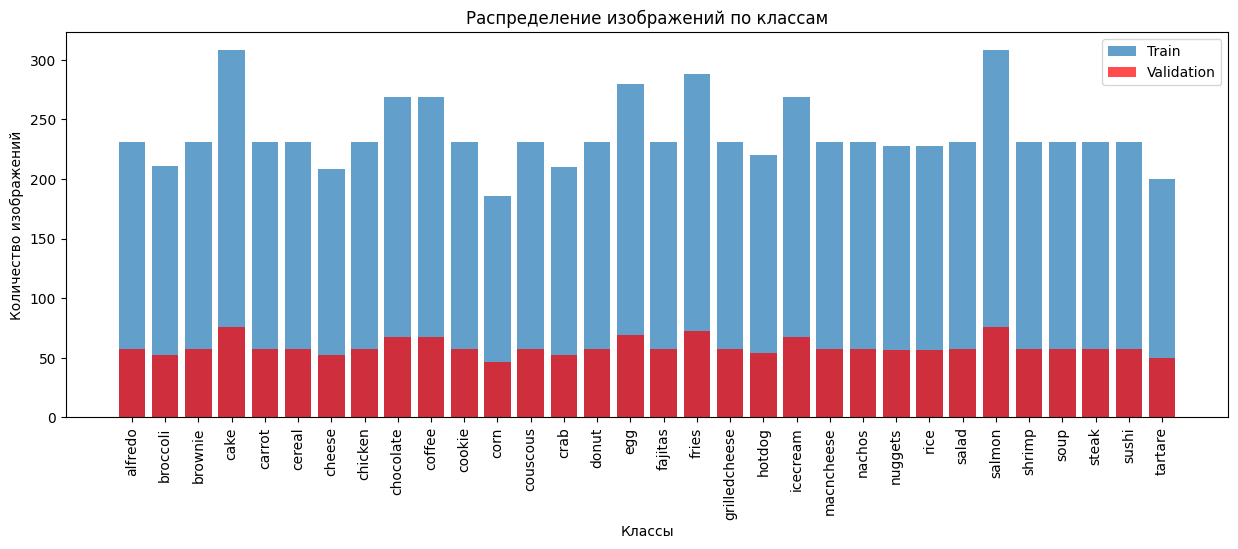

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# –ü–æ–ª—É—á–∞–µ–º —Å–ø–∏—Å–æ–∫ –∫–ª–∞—Å—Å–æ–≤
class_labels = list(train_generator.class_indices.keys())

# –°—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –∫–∞–∂–¥–æ–º –∫–ª–∞—Å—Å–µ
train_counts = np.bincount(train_generator.classes)
val_counts = np.bincount(validation_generator.classes)

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤
plt.figure(figsize=(15, 5))
plt.bar(class_labels, train_counts, label="Train", alpha=0.7)
plt.bar(class_labels, val_counts, label="Validation", alpha=0.7, color='red')
plt.xticks(rotation=90)
plt.xlabel("–ö–ª–∞—Å—Å—ã")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –ø–æ –∫–ª–∞—Å—Å–∞–º")
plt.legend()
plt.show()


## –°–æ–∑–¥–∞–µ–º –∏ –æ–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å

In [ ]:
from tensorflow.keras import layers, models

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏
input_shape = (img_height, img_width, 3)
num_classes = len(train_generator.class_indices)

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É –º–æ–¥–µ–ª–∏ CNN
model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # –†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è –¥–ª—è –∏–∑–±–µ–∂–∞–Ω–∏—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è
        layers.Dense(num_classes, activation='softmax')  # –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –Ω–∞ 32 –∫–ª–∞—Å—Å–∞
    ])

# –ö–æ–º–ø–∏–ª–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# –í—ã–≤–æ–¥–∏–º –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É –º–æ–¥–µ–ª–∏
model.summary()


Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_3 (Conv2D)               ‚îÇ (None, 222, 222, 32)   ‚îÇ           896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_3 (MaxPooling2D)  ‚îÇ (None, 111, 111, 32)   ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_4 (Conv2D)               ‚îÇ (None, 109, 109, 64)   ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_4 (MaxPooling2D)  ‚îÇ (None, 54, 54, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_5 (Conv2D)               ‚îÇ (None, 52, 52, 128)    ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_5 (MaxPooling2D)  ‚îÇ (None, 26, 26, 128)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_1 (Flatten)             ‚îÇ (None, 86528)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 128)            ‚îÇ    11,075,712 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 32)             ‚îÇ         4,128 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 11,173,088 (42.62 MB)

 Trainable params: 11,173,088 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

–û–±—É—á–µ–Ω–∏–µ

In [ ]:
history = model.fit(
    train_generator,
    epochs=10, 
    validation_data=validation_generator
)

Epoch 1/10


c:\Users\–ê–ª–µ–∫—Å–∞–Ω–¥—Ä\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


238/238 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 241s 993ms/step - accuracy: 0.0845 - loss: 3.4643 - val_accuracy: 0.4402 - val_loss: 1.8712
Epoch 2/10
238/238 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 225s 935ms/step - accuracy: 0.3832 - loss: 1.9473 - val_accuracy: 0.7065 - val_loss: 1.0068
Epoch 3/10
238/238 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 228s 948ms/step - accuracy: 0.5396 - loss: 1.3745 - val_accuracy: 0.7645 - val_loss: 0.7392
Epoch 4/10
238/238 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 223s 926ms/step - accuracy: 0.6110 - loss: 1.1532 - val_accuracy: 0.8006 - val_loss: 0.6378
Epoch 5/10
238/238 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 237s 987ms/step - accuracy: 0.6789 - loss: 0.9222 - val_accuracy: 0.8262 - val_loss: 0.5699
Epoch 6/10
238/238 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 238s 992ms/step - accuracy: 0.6930 - loss: 0.8898 - val_accuracy: 0.840

## –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—Ä–æ—Ü–µ—Å—Å –æ–±—É—á–µ–Ω–∏—è

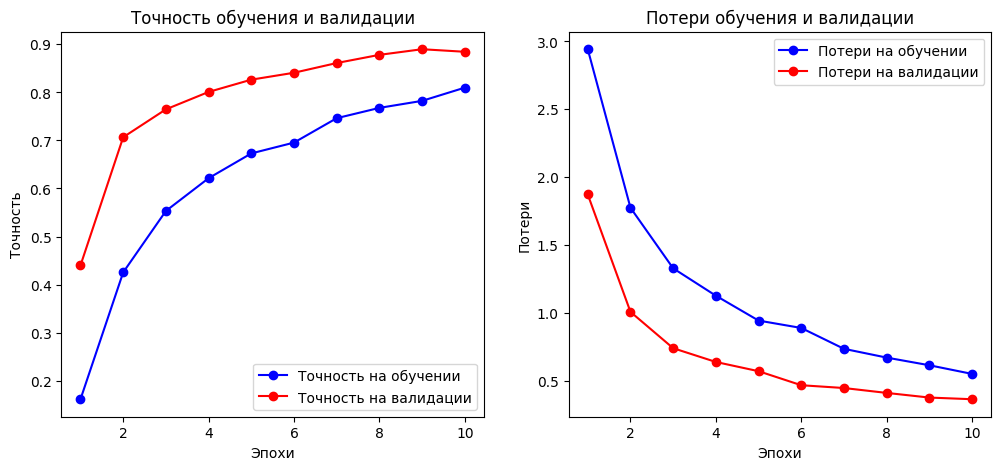

In [9]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# –ì—Ä–∞—Ñ–∏–∫ —Ç–æ—á–Ω–æ—Å—Ç–∏
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –æ–±—É—á–µ–Ω–∏–∏')
plt.plot(epochs, val_acc, 'ro-', label='–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏')
plt.xlabel('–≠–ø–æ—Ö–∏')
plt.ylabel('–¢–æ—á–Ω–æ—Å—Ç—å')
plt.legend()
plt.title('–¢–æ—á–Ω–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏')

# –ì—Ä–∞—Ñ–∏–∫ –ø–æ—Ç–µ—Ä—å
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='–ü–æ—Ç–µ—Ä–∏ –Ω–∞ –æ–±—É—á–µ–Ω–∏–∏')
plt.plot(epochs, val_loss, 'ro-', label='–ü–æ—Ç–µ—Ä–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏')
plt.xlabel('–≠–ø–æ—Ö–∏')
plt.ylabel('–ü–æ—Ç–µ—Ä–∏')
plt.legend()
plt.title('–ü–æ—Ç–µ—Ä–∏ –æ–±—É—á–µ–Ω–∏—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏')

plt.show()


## –£–ª—É—á—à–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –ø–æ–º–æ—â—å—é –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π —Å–µ—Ç–∏ (Transfer Learning)

In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# –ó–∞–≥—Ä—É–∂–∞–µ–º –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—É—é MobileNetV2 (–±–µ–∑ –≤–µ—Ä—Ö–Ω–∏—Ö —Å–ª–æ–µ–≤)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# –ó–∞–º–æ—Ä–∞–∂–∏–≤–∞–µ–º –≤–µ—Å–∞ –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ (—á—Ç–æ–±—ã –Ω–µ –∏–∑–º–µ–Ω—è–ª–∏—Å—å –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏)
base_model.trainable = False

# –î–æ–±–∞–≤–ª—è–µ–º —Å–≤–æ–∏ —Å–ª–æ–∏ –ø–æ–≤–µ—Ä—Ö –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏
x = base_model.output
x = GlobalAveragePooling2D()(x)  # –ì–ª–æ–±–∞–ª—å–Ω–æ–µ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ
x = Dense(512, activation='relu')(x)  # –ù–æ–≤—ã–π –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π
x = Dropout(0.5)(x)  # –†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)  # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π

# –°–æ–∑–¥–∞–µ–º –Ω–æ–≤—É—é –º–æ–¥–µ–ª—å
model = Model(inputs=base_model.input, outputs=predictions)

# –ö–æ–º–ø–∏–ª–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# –í—ã–≤–æ–¥–∏–º –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É –º–æ–¥–µ–ª–∏
model.summary()


Model: "functional_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_2       ‚îÇ (None, 224, 224,  ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ 3)                ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Conv1 (Conv2D)      ‚îÇ (None, 112, 112,  ‚îÇ        864 ‚îÇ input_layer_2[0]‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bn_Conv1            ‚îÇ (None, 112, 112,  ‚îÇ        128 ‚îÇ Conv1[0][0]       ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Conv1_relu (ReLU)   ‚îÇ (None, 112, 112,  ‚îÇ          0 ‚îÇ bn_Conv1[0][0]    ‚îÇ
‚îÇ                     ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_dept‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ        288 ‚îÇ Conv1_relu[0][0]  ‚îÇ
‚îÇ (DepthwiseConv2D)   ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_dept‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ        128 ‚îÇ expanded_conv_de‚Ä¶ ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_dept‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ          0 ‚îÇ expanded_conv_de‚Ä¶ ‚îÇ
‚îÇ (ReLU)              ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_proj‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ        512 ‚îÇ expanded_conv_de‚Ä¶ ‚îÇ
‚îÇ (Conv2D)            ‚îÇ 16)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_proj‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ         64 ‚îÇ expanded_conv_pr‚Ä¶ ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 16)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

 Total params: 3,053,408 (11.65 MB)

 Trainable params: 795,424 (3.03 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

–û–±—É—á–µ–Ω–∏–µ —Å transfer learning

In [11]:
# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π —Å–µ—Ç—å—é
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
238/238 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 269s 1s/step - accuracy: 0.6906 - loss: 1.1848 - val_accuracy: 0.9872 - val_loss: 0.0454
Epoch 2/10
238/238 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 260s 1s/step - accuracy: 0.9781 - loss: 0.0675 - val_accuracy: 0.9936 - val_loss: 0.0187
Epoch 3/10
238/238 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 260s 1s/step - accuracy: 0.9862 - loss: 0.0497 - val_accuracy: 0.9936 - val_loss: 0.0263
Epoch 4/10
238/238 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 260s 1s/step - accuracy: 0.9893 - loss: 0.0332 - val_accuracy: 0.9952 - val_loss: 0.0224
Epoch 5/10
238/238 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 259s 1s/step - accuracy: 0.9858 - loss: 0.0462 - val_accuracy: 0.9942 - val_loss: 0.0165
Epoch 6/10
238/238 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 264s 1s/step - accuracy: 0.9914 - loss: 0.0299 - val_accuracy: 0.9920 - val

## –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–æ–æ–±—É—á–µ–Ω–∏—è

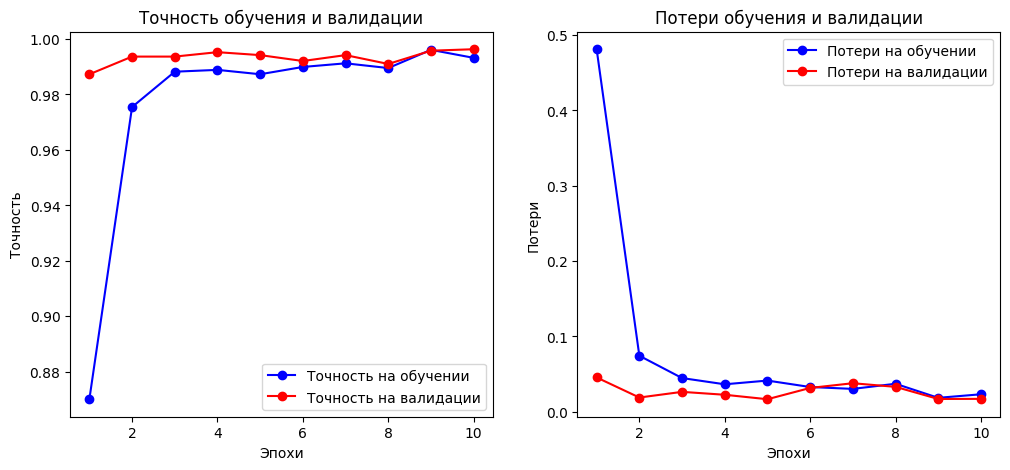

In [12]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# –ì—Ä–∞—Ñ–∏–∫ —Ç–æ—á–Ω–æ—Å—Ç–∏
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –æ–±—É—á–µ–Ω–∏–∏')
plt.plot(epochs, val_acc, 'ro-', label='–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏')
plt.xlabel('–≠–ø–æ—Ö–∏')
plt.ylabel('–¢–æ—á–Ω–æ—Å—Ç—å')
plt.legend()
plt.title('–¢–æ—á–Ω–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏')

# –ì—Ä–∞—Ñ–∏–∫ –ø–æ—Ç–µ—Ä—å
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='–ü–æ—Ç–µ—Ä–∏ –Ω–∞ –æ–±—É—á–µ–Ω–∏–∏')
plt.plot(epochs, val_loss, 'ro-', label='–ü–æ—Ç–µ—Ä–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏')
plt.xlabel('–≠–ø–æ—Ö–∏')
plt.ylabel('–ü–æ—Ç–µ—Ä–∏')
plt.legend()
plt.title('–ü–æ—Ç–µ—Ä–∏ –æ–±—É—á–µ–Ω–∏—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏')

plt.show()




## –†–µ–∞–ª–∏–∑–∞—Ü–∏—è –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏
–ò—Å–ø–æ–ª—å–∑—É–µ–º K=5 (5-—Ñ–æ–ª–¥–æ–≤–∞—è –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è):

In [17]:
from sklearn.model_selection import KFold
import numpy as np

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True)

# –°–ø–∏—Å–æ–∫ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
fold_accuracies = []

# –ì–µ–Ω–µ—Ä–∞—Ç–æ—Ä –¥–∞–Ω–Ω—ã—Ö (–∏—Å–ø–æ–ª—å–∑—É–µ–º –æ–¥–∏–Ω –Ω–∞–±–æ—Ä –±–µ–∑ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è train/val)
datagen = ImageDataGenerator(rescale=1./255)
all_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# –†–∞–∑–±–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ K —á–∞—Å—Ç–µ–π –∏ –æ–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ –∫–∞–∂–¥–æ–π –∏–∑ –Ω–∏—Ö
for fold, (train_idx, val_idx) in enumerate(kf.split(all_data)):
    print(f"\nüîπ **–û–±—É—á–µ–Ω–∏–µ –Ω–∞ —Ñ–æ–ª–¥–µ {fold+1}/{k_folds}**")

    # –°–æ–∑–¥–∞–µ–º –Ω–æ–≤—É—é –º–æ–¥–µ–ª—å MobileNetV2 –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ñ–æ–ª–¥–∞
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False  # –ó–∞–º–æ—Ä–∞–∂–∏–≤–∞–µ–º –≤–µ—Å–∞

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
    history = model.fit(
        all_data,
        epochs=5,  # –£–º–µ–Ω—å—à–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö –¥–ª—è –±—ã—Å—Ç—Ä–æ–π –ø—Ä–æ–≤–µ—Ä–∫–∏
        verbose=1
    )

    # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ç–æ—á–Ω–æ—Å—Ç—å –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ñ–æ–ª–¥–∞
    final_acc = history.history['accuracy'][-1]
    fold_accuracies.append(final_acc)

# –°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å –ø–æ –≤—Å–µ–º —Ñ–æ–ª–¥–∞–º
mean_acc = np.mean(fold_accuracies)
print(f"\n‚úÖ **–°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ {k_folds}-—Ñ–æ–ª–¥–æ–≤–æ–π –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: {mean_acc:.4f}**")


Found 9490 images belonging to 32 classes.

üîπ **–û–±—É—á–µ–Ω–∏–µ –Ω–∞ —Ñ–æ–ª–¥–µ 1/5**
Epoch 1/5


c:\Users\–ê–ª–µ–∫—Å–∞–Ω–¥—Ä\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


297/297 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 281s 917ms/step - accuracy: 0.7186 - loss: 1.0752
Epoch 2/5
297/297 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 269s 899ms/step - accuracy: 0.9844 - loss: 0.0486
Epoch 3/5
297/297 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 269s 898ms/step - accuracy: 0.9850 - loss: 0.0490
Epoch 4/5
297/297 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 265s 886ms/step - accuracy: 0.9866 - loss: 0.0375
Epoch 5/5
297/297 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 247s 821ms/step - accuracy: 0.9883 - loss: 0.0390

üîπ **–û–±—É—á–µ–Ω–∏–µ –Ω–∞ —Ñ–æ–ª–¥–µ 2/5**
Epoch 1/5
297/297 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 263s 861ms/step - accuracy: 0.7268 - loss: 1.0487
Epoch 2/5
297/297 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 247s 823ms/step - accuracy: 0.9788 - loss: 0.0758
Epoch 3/5
297/297 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø–æ —Ñ–æ–ª–¥–∞–º:
–§–æ–ª–¥ 1: 0.9862
–§–æ–ª–¥ 2: 0.9907
–§–æ–ª–¥ 3: 0.9914
–§–æ–ª–¥ 4: 0.9894
–§–æ–ª–¥ 5: 0.9864

–°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å: 0.9888
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 0.0021
–ú–∏–Ω–∏–º—É–º: 0.9862
–ú–∞–∫—Å–∏–º—É–º: 0.9914


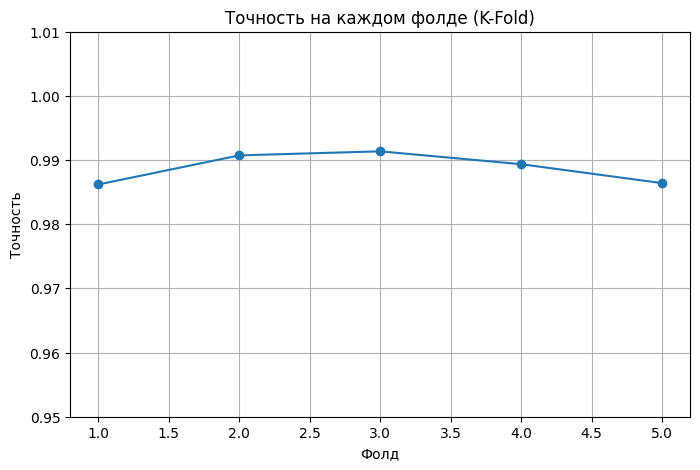

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# –†–∞—Å—á–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
mean_acc = np.mean(fold_accuracies)
std_acc = np.std(fold_accuracies)
min_acc = np.min(fold_accuracies)
max_acc = np.max(fold_accuracies)

print("–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø–æ —Ñ–æ–ª–¥–∞–º:")
for i, acc in enumerate(fold_accuracies, 1):
    print(f"–§–æ–ª–¥ {i}: {acc:.4f}")
print(f"\n–°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å: {mean_acc:.4f}")
print(f"–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: {std_acc:.4f}")
print(f"–ú–∏–Ω–∏–º—É–º: {min_acc:.4f}")
print(f"–ú–∞–∫—Å–∏–º—É–º: {max_acc:.4f}")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(fold_accuracies)+1), fold_accuracies, marker='o')
plt.title("–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∫–∞–∂–¥–æ–º —Ñ–æ–ª–¥–µ (K-Fold)")
plt.xlabel("–§–æ–ª–¥")
plt.ylabel("–¢–æ—á–Ω–æ—Å—Ç—å")
plt.ylim(0.95, 1.01)
plt.grid(True)
plt.show()


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 890ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 811ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 820ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 842ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 785ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 802ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 795ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 826ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 784ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 797ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 764ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 845ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

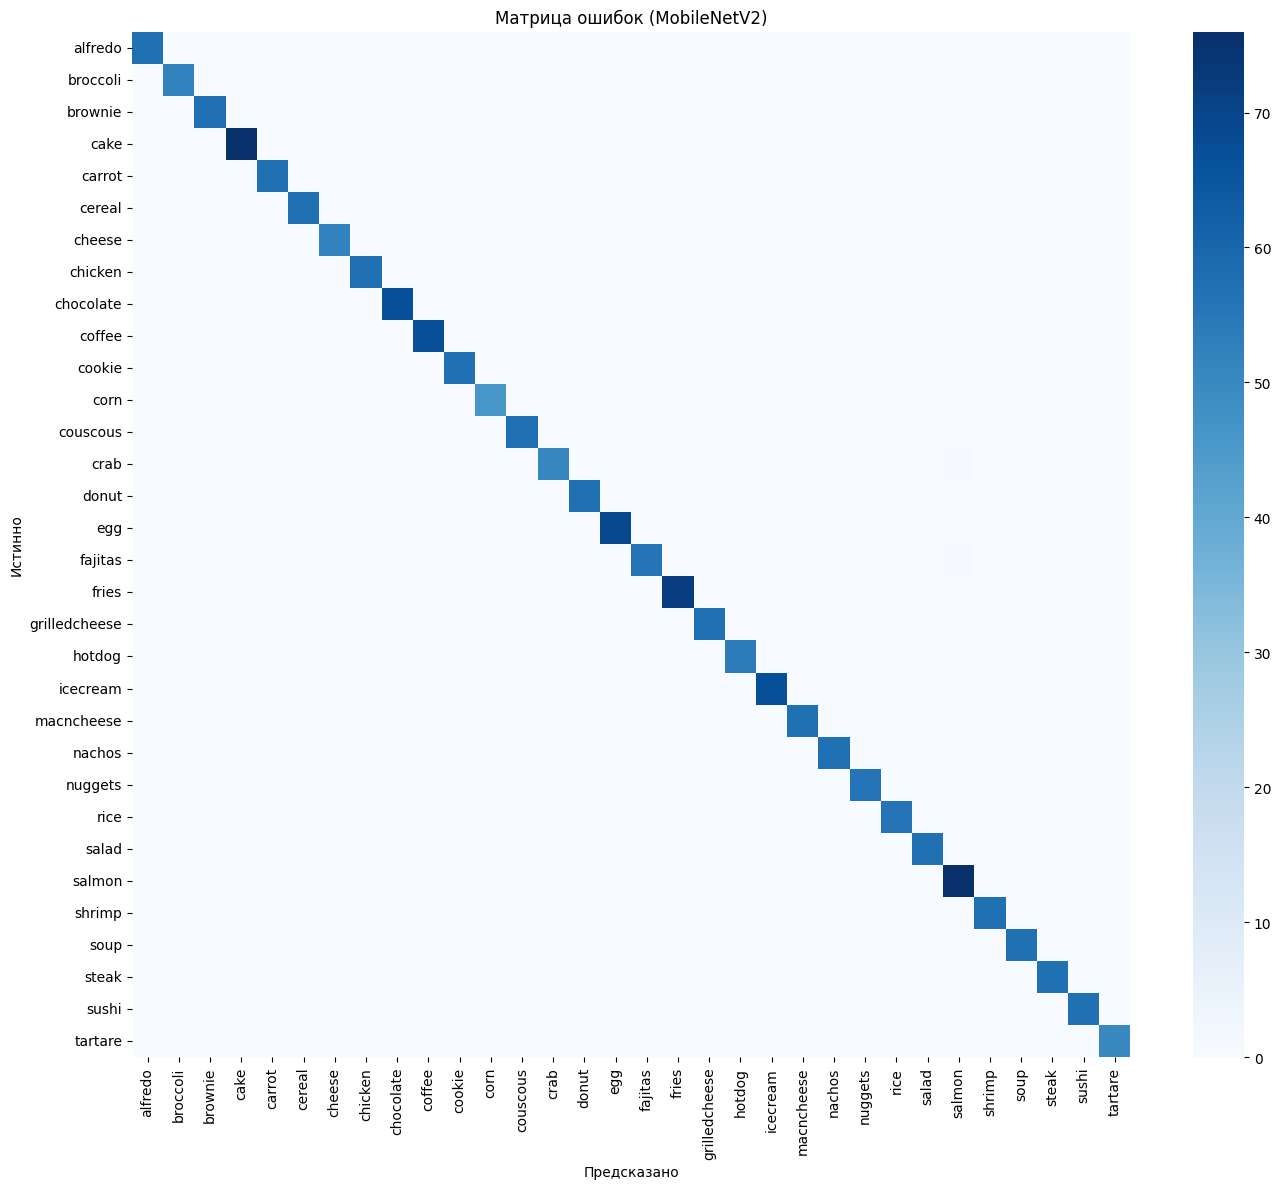

               precision    recall  f1-score   support

      alfredo       1.00      1.00      1.00        57
     broccoli       1.00      1.00      1.00        52
      brownie       1.00      1.00      1.00        57
         cake       1.00      1.00      1.00        76
       carrot       1.00      1.00      1.00        57
       cereal       1.00      1.00      1.00        57
       cheese       1.00      1.00      1.00        52
      chicken       1.00      1.00      1.00        57
    chocolate       1.00      1.00      1.00        67
       coffee       1.00      1.00      1.00        67
       cookie       1.00      1.00      1.00        57
         corn       1.00      1.00      1.00        46
     couscous       1.00      1.00      1.00        57
         crab       1.00      0.98      0.99        52
        donut       1.00      1.00      1.00        57
          egg       1.00      1.00      1.00        69
      fajitas       1.00      0.98      0.99        57
        f

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


y_true = []
y_pred = []
class_labels = list(train_generator.class_indices.keys())

# –°–±—Ä–æ—Å –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞
validation_generator.reset()

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –ø–æ –≤—Å–µ–º –±–∞—Ç—á–∞–º
for i in range(len(validation_generator)):
    x_batch, y_batch = next(validation_generator)
    preds = model.predict(x_batch)
    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))
    if i >= validation_generator.samples // validation_generator.batch_size:
        break

# –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫
cm = confusion_matrix(y_true, y_pred)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–æ')
plt.ylabel('–ò—Å—Ç–∏–Ω–Ω–æ')
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ (MobileNetV2)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# –û—Ç—á–µ—Ç –ø–æ –∫–ª–∞—Å—Å–∞–º
print(classification_report(y_true, y_pred, target_names=class_labels))


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 774ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 771ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 753ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 734ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 736ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 750ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 737ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 721ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 751ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 728ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 736ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 733ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

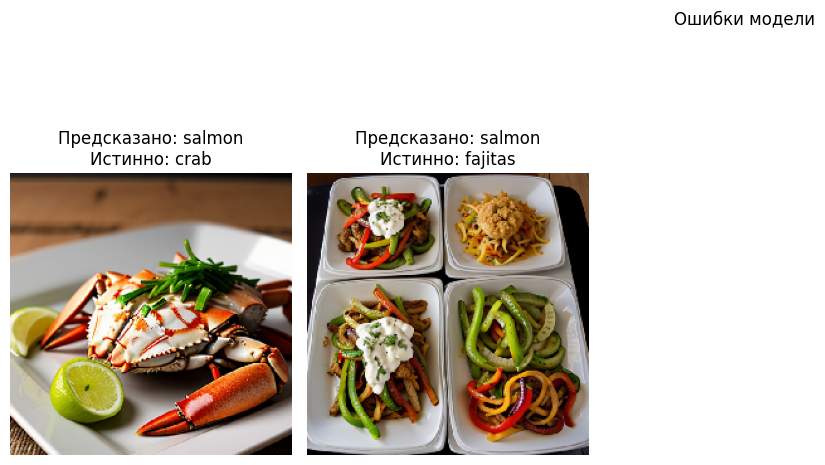

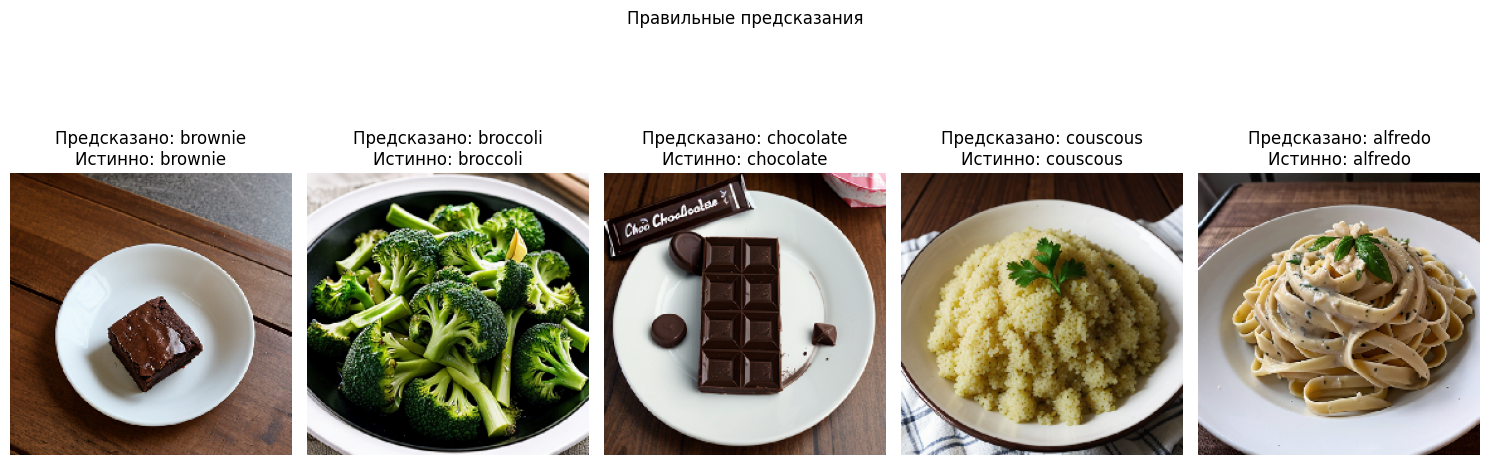

In [20]:
import matplotlib.pyplot as plt

# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–º–µ—Ä–æ–≤
num_images_to_show = 5

# –û–±–Ω—É–ª—è–µ–º
validation_generator.reset()
y_true = []
y_pred = []
images = []

# –ü–æ–ª—É—á–∞–µ–º –±–∞—Ç—á–∏ –∏ —Å–æ—Ö—Ä–∞–Ω—è–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
for i in range(len(validation_generator)):
    x_batch, y_batch = next(validation_generator)
    preds = model.predict(x_batch)
    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))
    images.extend(x_batch)
    if len(y_true) >= validation_generator.samples:
        break

# –ü–µ—Ä–µ–≤–æ–¥–∏–º –≤ –º–∞—Å—Å–∏–≤—ã
y_true = np.array(y_true)
y_pred = np.array(y_pred)
images = np.array(images)
class_labels = list(validation_generator.class_indices.keys())

# –ù–∞–π–¥–µ–º –æ—à–∏–±–∫–∏
error_indices = np.where(y_true != y_pred)[0]
correct_indices = np.where(y_true == y_pred)[0]

# –§—É–Ω–∫—Ü–∏—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
def show_images(indices, title):
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(indices[:num_images_to_show]):
        plt.subplot(1, num_images_to_show, i + 1)
        plt.imshow(images[idx])
        plt.axis('off')
        plt.title(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–æ: {class_labels[y_pred[idx]]}\n–ò—Å—Ç–∏–Ω–Ω–æ: {class_labels[y_true[idx]]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# –ü–æ–∫–∞–∂–µ–º –æ—à–∏–±–∫–∏
show_images(error_indices, "–û—à–∏–±–∫–∏ –º–æ–¥–µ–ª–∏")

# –ü–æ–∫–∞–∂–µ–º –ø—Ä–∞–≤–∏–ª—å–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
show_images(correct_indices, "–ü—Ä–∞–≤–∏–ª—å–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è")


–°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å

In [22]:
# –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å –∫–∞–∫ .h5
model.save("content/food_classifier_model.h5")


# –í—Ç–æ—Ä–∞—è –º–æ–¥–µ–ª—å

## –ó–∞–≥—Ä—É–∑–∫–∞ –ø–µ—Ä–≤–æ–π –º–æ–¥–µ–ª–∏ –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# –ó–∞–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å
model = load_model('content/food_classifier_model.h5')
img_height, img_width = 224, 224

## –§—É–Ω–∫—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ —Ä–∞–±–æ—Ç–∞—é—Ç —Å –ø–µ—Ä–≤–æ–π –º–æ–¥–µ–ª—å—é

In [ ]:
import os
import random

# –†–∞–∑–±–∏—Ä–∞–µ–º –ø–∞–ø–∫–∏ –≤ image –Ω–∞ –∫–ª–∞—Å—Å—ã
def get_class_labels():
    classes_dir = os.path.join('image')
    return sorted([d for d in os.listdir(classes_dir) 
                 if os.path.isdir(os.path.join(classes_dir, d))])

# –ü—ã—Ç–∞–µ–º—Å—è —Å–¥–µ–ª–∞—Ç—å —Ä–∞–Ω–¥–æ–º–Ω—ã–π –≤—ã–±–æ—Ä
def get_random_photo():
    root_folder = "image"
    class_folders = [d for d in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, d))]
    random_class = random.choice(class_folders)
    class_path = os.path.join(root_folder, random_class)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]
    random_image = random.choice(image_files)
    img_path = os.path.join(class_path, random_image)
    # print(f"–ö–ª–∞—Å—Å: {random_class}")
    # print(f"–§–∞–π–ª: {random_image}")
    # print(f"–ü–æ–ª–Ω—ã–π –ø—É—Ç—å: {img_path}")
    return img_path

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –∫–ª–∞—Å—Å–∞ –ø–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—é
def predict_class(model, img_path):
    # –ü–æ–ª—É—á–∞–µ–º –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤ –∏–∑ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∞—Ç–∞—Å–µ—Ç–∞
    class_labels = get_class_labels()
    # print(class_labels)
    
    # –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    pred = model.predict(img_array)
    return class_labels[np.argmax(pred)] #, np.max(pred) # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –±–ª—é–¥–æ –∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å "–ø—Ä–∞–≤–∏–ª—å–Ω–æ—Å—Ç–∏"



# –ü—Ä–æ–≤–µ—Ä–∫–∞
predicted_label = predict_class(model, get_random_photo())

print(f"–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –±–ª—é–¥–æ: {predicted_label}")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2s/step
–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –±–ª—é–¥–æ: cheese


## –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏

In [57]:
!pip install -q huggingface_hub
!pip install transformers accelerate



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Program Files\Python313\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Program Files\Python313\python.exe -m pip install --upgrade pip


## –í—Ö–æ–¥ –∏ —É—Å—Ç–∞–Ω–æ–≤–∫–∞

In [ ]:
from huggingface_hub import login
login(token="token")

In [38]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
model_id = "mistralai/Mistral-7B-Instruct-v0.2"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model_neo = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",            # –ò—Å–ø–æ–ª—å–∑—É–µ—Ç GPU, –µ—Å–ª–∏ –¥–æ—Å—Ç—É–ø–µ–Ω
    torch_dtype=torch.float16     # –ò—Å–ø–æ–ª—å–∑—É–π float32, –µ—Å–ª–∏ –Ω–µ—Ç GPU
)

c:\Users\–ê–ª–µ–∫—Å–∞–Ω–¥—Ä\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\–ê–ª–µ–∫—Å–∞–Ω–¥—Ä\.cache\huggingface\hub\models--mistralai--Mistral-7B-Instruct-v0.2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Loading checkpoint shards: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

## –§—É–Ω–∫—Ü–∏–∏ –¥–ª—è —Ä–∞–±–æ—Ç—ã –≤—Ç–æ—Ä–æ–π –º–æ–¥–µ–ª–∏

In [ ]:
def get_prompt(dish_name):
    return f"[INST] –¢—ã –¥–∏–µ—Ç–æ–ª–æ–≥. –û—Ü–µ–Ω–∏, —Å–∫–æ–ª—å–∫–æ –∫–∞–ª–æ—Ä–∏–π –ø—Ä–∏–º–µ—Ä–Ω–æ —Å–æ–¥–µ—Ä–∂–∏—Ç –±–ª—é–¥–æ '{dish_name}'. –£–∫–∞–∂–∏ –∫–∞–ª–æ—Ä–∏–π–Ω–æ—Å—Ç—å –∏ –∫—Ä–∞—Ç–∫–æ –ø—Ä–æ–∫–æ–º–º–µ–Ω—Ç–∏—Ä—É–π, –ø–æ–¥—Ö–æ–¥–∏—Ç –ª–∏ –æ–Ω–æ –¥–ª—è —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –ø–∏—Ç–∞–Ω–∏—è. [/INST]"

# –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è —Å –ø–µ—Ä–µ–º–µ—â–µ–Ω–∏–µ–º –Ω–∞ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏
def get_answer_from_neo(prompt):
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model_neo.device)

    # –ì–µ–Ω–µ—Ä–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞
    output = model_neo.generate(
        input_ids,
        do_sample=True,
        temperature=0.7,
        max_new_tokens=100,  
        pad_token_id=tokenizer.eos_token_id,
        top_p = 0.85,
        repetition_penalty=1.1,
        no_repeat_ngram_size=3
    )

    # –î–µ–∫–æ–¥–∏—Ä—É–µ–º —Ç–æ–ª—å–∫–æ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—É—é —á–∞—Å—Ç—å (–∏—Å–∫–ª—é—á–∞—è –ø—Ä–æ–º–ø—Ç)
    generated_text = tokenizer.decode(output[0][input_ids.shape[1]:], skip_special_tokens=True)

    return generated_text

## –û—Ç–≤–µ—Ç –º–æ–¥–µ–ª–∏

In [40]:
# –ø—Ä–æ–≤–µ—Ä–∫–∞
print("–û—Ç–≤–µ—Ç –Ω–µ–æ:\n" )
promt = get_prompt(predict_class(model,get_random_photo()))
print(promt)
print(get_answer_from_neo(promt))

–û—Ç–≤–µ—Ç –Ω–µ–æ:

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 349ms/step
[INST] –¢—ã –¥–∏–µ—Ç–æ–ª–æ–≥. –û—Ü–µ–Ω–∏, —Å–∫–æ–ª—å–∫–æ –∫–∞–ª–æ—Ä–∏–π –ø—Ä–∏–º–µ—Ä–Ω–æ —Å–æ–¥–µ—Ä–∂–∏—Ç –±–ª—é–¥–æ 'couscous'. –£–∫–∞–∂–∏ –∫–∞–ª–æ—Ä–∏–π–Ω–æ—Å—Ç—å –∏ –∫—Ä–∞—Ç–∫–æ –ø—Ä–æ–∫–æ–º–º–µ–Ω—Ç–∏—Ä—É–π, –ø–æ–¥—Ö–æ–¥–∏—Ç –ª–∏ –æ–Ω–æ –¥–ª—è —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –ø–∏—Ç–∞–Ω–∏—è. [/INST]
As a dietitian, I'd be happy to help you estimate the calorie content of couscous. One cup (cooked) of plain couscouse contains approximately 205 calories. Couscouse is primarily made from durum wheat semolina and water, so most of its calories come from complex carbohydrates.

Couscouses can be an excellent addition to a balanced diet due to its versatility, as it can be
